# Week 7 - Dimensionality reduction

Welcome to week 7 of our course. Today, we'll focus on dimensionality reduction. In fact, we're approaching the full monty for being a Data Scientist. In other words, in this notebook, you'll experience a lot of the whole process, including data preparation, dimensionality reduction, exploratory analysis (clustering in this case), model building (classification in this case), and evaluation.

## Part 1 - Covariance, trace, correlation

Let's start with the basics: get insights of the concepts of Covariance, trace and correlation. 

...but first, let's do the usual imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We will use a well dataset well-known to you, "NYC_taxis_weather_2016_with_dummies.csv". It's amazing the number of things we can do with a single one!... 

In [73]:
f=pd.read_csv("NYC_taxis_weather_2016_with_dummies.csv")

In [74]:
f

,datetime,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,...,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night,is_weekend
0,2016-01-01 00:00:00,162,202.0,307.0,109.0,171.0,198.0,306.0,40.0,54.0,...,0,0,0,0,0,0,0,0,1,False
1,2016-01-01 00:15:00,251,394.0,202.0,162.0,109.0,312.0,198.0,29.0,40.0,...,0,0,0,0,0,0,0,0,1,False
2,2016-01-01 00:30:00,310,420.0,394.0,251.0,162.0,699.0,312.0,16.0,29.0,...,0,0,0,0,0,0,0,0,1,False
3,2016-01-01 00:45:00,338,310.0,420.0,310.0,251.0,482.0,699.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,False
4,2016-01-01 01:00:00,369,403.0,310.0,338.0,310.0,459.0,482.0,2.0,3.0,...,0,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,2016-06-30 22:45:00,316,639.0,624.0,318.0,291.0,406.0,305.0,201.0,189.0,...,0,0,0,0,1,0,0,0,0,False
17468,2016-06-30 23:00:00,299,593.0,639.0,316.0,318.0,347.0,406.0,168.0,201.0,...,0,0,0,0,0,0,0,0,1,False
17469,2016-06-30 23:15:00,283,617.0,593.0,299.0,316.0,252.0,347.0,104.0,168.0,...,0,0,0,0,0,0,0,0,1,False
17470,2016-06-30 23:30:00,276,580.0,617.0,283.0,299.0,246.0,252.0,87.0,104.0,...,0,0,0,0,0,0,0,0,1,False


Read the code below. What does it do?

In [75]:


f['datetime']=pd.to_datetime(f['datetime'], format="%Y-%m-%d %H:%M:%S")
f=f.set_index('datetime')
f['date']=np.array([d.date() for d in f.index])

grouped=list(set(f['date']))  #transforms f['date'], a series of days WITH repetitions, into a set. Then we convert it back to
# a list WITHOUT repititions. To understand this, just check the original value of f['date'], and the output set(f['date'])

days={}
for g in grouped:
    day_ts=np.array(f[f.date==g]['pickups1'])
    days[g]=day_ts

d=pd.DataFrame(days)
dt=d.transpose()

In [82]:
dt

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2016-01-23,229,199,175,153,146,127,113,102,108,94,...,0,0,0,1,1,0,0,0,0,0
2016-04-29,180,149,142,122,97,78,88,85,72,74,...,297,321,333,310,316,301,292,267,282,268
2016-02-25,125,134,115,102,85,66,62,45,42,48,...,323,312,357,341,379,301,287,283,228,188
2016-05-17,112,97,74,64,63,64,42,41,27,23,...,380,357,378,369,304,299,306,251,207,194
2016-06-11,295,292,243,209,197,197,160,154,129,107,...,264,255,241,216,232,257,247,223,252,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-13,222,194,192,144,136,112,110,74,73,68,...,277,295,277,292,285,268,277,307,285,299
2016-04-10,306,344,274,257,250,226,205,187,168,169,...,141,147,138,111,120,115,105,87,87,95
2016-06-20,63,41,57,41,36,25,35,25,23,21,...,287,228,279,274,220,189,152,155,131,136
2016-02-21,296,298,281,283,293,244,209,180,187,159,...,126,122,115,86,125,96,94,75,70,58


After you are sure you understand what dt contains, check its covariance matrix.


In [6]:
np.cov(dt.T) #you could have done dt.cov(), or even np.cov(dt, rowvar=False) which are equivalent...

array([[6330.9467549 , 5976.90401311, 5754.72308907, ..., 1074.15305689,
        1481.83036853, 1921.9690972 ],
       [5976.90401311, 6117.94344606, 5746.4491227 , ...,  867.23222634,
        1342.16556372, 1760.21859632],
       [5754.72308907, 5746.4491227 , 5875.89985429, ...,  513.27126465,
         964.90553093, 1382.19170056],
       ...,
       [1074.15305689,  867.23222634,  513.27126465, ..., 6425.13192884,
        5788.43713193, 5724.39645437],
       [1481.83036853, 1342.16556372,  964.90553093, ..., 5788.43713193,
        5899.31977415, 5733.22233016],
       [1921.9690972 , 1760.21859632, 1382.19170056, ..., 5724.39645437,
        5733.22233016, 6177.77357173]])

What does the covariance value mean (e.g. between two variables)? If we get a high covariance, does it mean the variables are somehow related, or is it the opposite?

To test it, create pairs of numpy vectors, and determine their covariance. 

In [83]:
v1=np.array([1,2,3,4,5,6])
v2=np.array([1,2,3,4,5,6])
v3=np.array([9,8,7,6,5,4])
v4=np.array([4,2,6,3,.7,8])

In [8]:
np.cov(v1, v4)

array([[3.5  , 1.31 ],
       [1.31 , 7.175]])

What about the trace of the covariance matrix. Can you calculate it?

In [84]:
np.trace(dt)

19429

###Although the trace of the covariance matrix, tr(C), gives you a measure of the total variance, it does not take into account the correlation between variables.

What is the meaning of the trace of the covariance matrix of a dataset?

__R: It corresponds to the total variance in the data__

What is the relationship between covariance and correlation? Do you want to calculate the covariance and correlation for dt and the vectors you invented above?

In [10]:
np.corrcoef(v1, v4)

array([[1.        , 0.26141248],
       [0.26141248, 1.        ]])

## Part 2 - Eigendecomposition

You can extract the eigenvalues and eigenvectors of a matrix using the function
> np.linalg.eig(...)

Check how to use it and apply it to our dataset (follow the slides)?

In [11]:
eigenValues, eigenVectors = np.linalg.eig(dt.cov())

The slides say that "As the eigenvectors are orthogonal to each other, the principal components will be uncorrelated." Can you confirm that on the data?


In [85]:
np.dot(eigenVectors[0].T, eigenVectors[1])

-1.5333567748854193e-13

We also say that we "constrain |u1| such that $u_1^Tu_1=1$"

Can you confirm this on the data (notice that u1 is simply the first eigenvector)

In [86]:
np.linalg.norm(eigenVectors[0])

0.9999999999999409

## Part 3 - PCA class in sklearn

As always happens in sklearn, and a lot of python packages, there are classes/objects available that perform very complex tasks. In this case, the PCA class helps you do practically everything you need in terms of Principal Components Analsysis. Let's get it running...

In [87]:
from sklearn import decomposition

In [88]:
pca=decomposition.PCA()

As with the other models in sklearn, you estimate it with the fit function

In [89]:
pca.fit(dt)

PCA()

Notice that you're supposed to tell how many components it estimates with the parameter "n_components". If you don't say anything, it estimates all of them (**and how many is this?**). 

A very useful functionality of the PCA object is that it provides the explained variance ratio, by each eigenvector, in decreasing order

In [90]:
pca.explained_variance_ratio_

array([5.98644549e-01, 2.22098972e-01, 4.27495095e-02, 3.57151677e-02,
       1.48385467e-02, 8.60428948e-03, 6.14926807e-03, 4.82005194e-03,
       3.84586348e-03, 3.50204319e-03, 2.78437513e-03, 2.45456126e-03,
       2.38328391e-03, 2.24063228e-03, 1.99068103e-03, 1.87778851e-03,
       1.74893417e-03, 1.67169009e-03, 1.58668842e-03, 1.52070954e-03,
       1.44238840e-03, 1.41652014e-03, 1.37723973e-03, 1.31893399e-03,
       1.28486641e-03, 1.24463155e-03, 1.20649656e-03, 1.18759206e-03,
       1.11743134e-03, 1.07488753e-03, 1.04885617e-03, 1.04315905e-03,
       9.84864531e-04, 9.38833581e-04, 9.05785543e-04, 8.65281714e-04,
       8.57069695e-04, 8.17746346e-04, 8.13358983e-04, 7.79968703e-04,
       7.65578744e-04, 7.34164146e-04, 6.86584478e-04, 6.77837501e-04,
       6.62614231e-04, 6.21292590e-04, 6.12495108e-04, 6.03331465e-04,
       5.93550677e-04, 5.74493407e-04, 5.58223757e-04, 5.16730296e-04,
       4.92362046e-04, 4.73803261e-04, 4.58663055e-04, 4.42850948e-04,
      

The typical question is _how many vectors do I need to use, to cover X% of the variance?_

...and the typical answer is by creating a cumulative graph (similar to a cumulative distribution function, or CDF). Can you plot one?

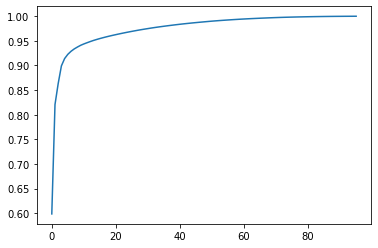

In [91]:
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);


In [96]:
# Can you reduce that number using PCA? How many variables (dimensions) will we need to keep 95% of the dimensionality?

i = 0
threshold = 0.95
while cdf[i] < threshold:
    i += 1
print(i, cdf[i])

13 0.9508311131408924


Another typical thing to do is to plot the eigenvectors themselves. 

The field components_ in the PCA object provides the eigenvectors:



In [97]:
pca.components_

array([[ 0.09060596,  0.09523997,  0.10180615, ..., -0.11517392,
        -0.09379586, -0.08181419],
       [-0.21757189, -0.21650594, -0.20529452, ..., -0.18261751,
        -0.18837964, -0.20061803],
       [ 0.17963923,  0.15684686,  0.13723983, ...,  0.22654331,
         0.21618476,  0.23152708],
       ...,
       [ 0.03728535,  0.00558026, -0.01202   , ...,  0.03817095,
        -0.06210976, -0.00283398],
       [-0.01283103,  0.05772351,  0.02526685, ...,  0.01994406,
         0.01358793, -0.00463572],
       [-0.07195712,  0.05097444, -0.06526331, ..., -0.04506492,
         0.03414787,  0.02917291]])

Do you want to try plotting them?

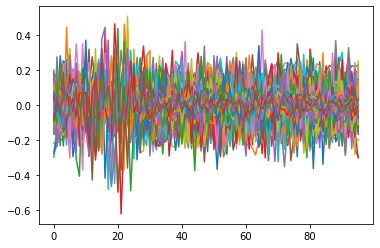

In [93]:
for eigenvector in pca.components_:
    plt.plot(range(len(eigenvector)), eigenvector)

How many vectors do you need, in order to explain 80% of the variance?

Can you plot them?

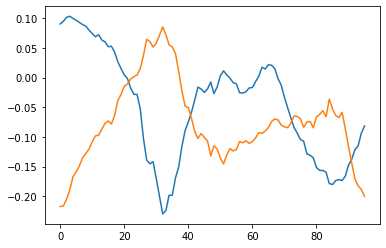

In [98]:
for eigenvector in pca.components_[:2]:
    plt.plot(range(len(eigenvector)), eigenvector)

VERY interesting result, isn't it? What's your interpretation?

## Part 4 - Correlation vs Covariance in PCA

PCA leads to different results, depending on whether it applies eigendecomposition to the correlation or the covariance matrix.

Above, we used covariance (default), let's now use correlation

In [99]:
pca=decomposition.PCA()

In practice, you just need to _standardize_ the data. In other words, each column should be removed its mean and divided by its standard deviation. Can you do it?

In [100]:
dt_stand = (dt - dt.mean()) / dt.std()

Let's estimate the pca model

In [101]:
pca.fit(dt_stand)

PCA()

Let's plot the cdf

[0.43816216418949633,
 0.7488767528764213,
 0.8075951693648237,
 0.8382999600079527,
 0.8655156492455517,
 0.8807089585498994,
 0.8897203143740058,
 0.8959421773419395,
 0.901208983758404,
 0.9062907035999809,
 0.9110189727673311,
 0.9152377267992076,
 0.9191233445801179,
 0.9229007489161243,
 0.9264723167922014]

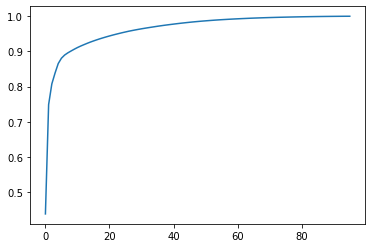

In [102]:
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
cdf[:15]


Look into the explained variance values. Compare them with the above version.

Plot the first two eigenvectors. Compare with above

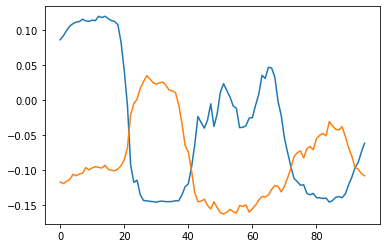

In [103]:
for eigenvector in pca.components_[:2]:
    plt.plot(range(len(eigenvector)), eigenvector)

## Part 5 - PCA in clustering

Ok, you learned about a technique that represents the data in a different way. How can this help you?...

One easy thing you can now do right away is to visualize the first 2 or 3 eigen vectors. With 2, you only need a 2D plot, so let's do it!

Estimate a new pca model, using the dt dataset above, with ONLY 2 components


In [107]:
pca_new=decomposition.PCA(n_components=2)
pca_new.fit(dt)

PCA(n_components=2)

Now, the true reason for all of this! For each data point, let's re-represent it with ONLY 2 dimensions... 


In [108]:
X_reduced=pca_new.transform(dt)

Confirm that each data point only has 2 dimensions. Notice that we passed from 96 to 2!

In [109]:
X_reduced.shape

(182, 2)

In [110]:
len(X_reduced[0])

2

Cool, now let's plot this, where the x axis corresponds to the first dimension, and the y axis to the second one.

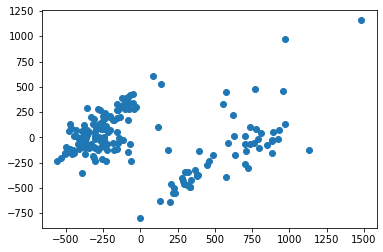

In [111]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1]);

WOW! There are clearly two clusters... think of the 2 eigenvectors we visualized above. What does this mean? Notice that each data point corresponds to the full pattern of one day of taxi data...

-------

When we visualize clearly data into clusters like above, we tipically ask ourselves, what's so special about each cluster.

For example, would it be that there are "weekend" patterns, and "weekday" patterns? The best way to find out is to plot it. For example using colors (red for weekend, blue for weekday)

In order to do that visualization, we need quite some data preparation. For example, we need to bring that info ("is_weekend") into the dataset...

In [121]:
dt_reduced=pd.DataFrame(X_reduced)  #X_reduced is still a numpy array, let's create a Pandas DataFrame

In [120]:
fnew=dt_reduced[:]  #Let's make a copy, just in case...
fnew['date']=dt.index   #bringing the original dates to the data frame

<ipython-input-120-2b9e41e12586>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnew['date']=dt.index   #bringing the original dates to the data frame


We need to add the other info (let's add weather data too, it will be useful later)

In [122]:
f_merged=pd.merge(f[['temp', 'prcp', 'fog', 'rain_drizzle', 'is_weekend', 'date']], fnew,  on='date', how='inner').drop_duplicates()

Let's index the lines with date

In [123]:
f_merged=f_merged.set_index('date')

Now, the scatter plot with colors. Take a look at this code. What does it do?

In [124]:
def assign_color(x):
    if x==True:
        return 'red'
    else:
        return 'blue'
colours=[assign_color(x) for x in f_merged['is_weekend']]

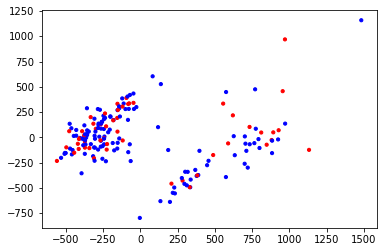

In [125]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=colours, s=10);

Hmm... our hypothesis is not that strong. The colors seem pretty mixed up. Do you want to try with other data?

In [126]:
def assign_color(x):
    if x==True:
        return 'red'
    else:
        return 'blue'
colours=[assign_color(x) for x in f_merged['rain_drizzle']]

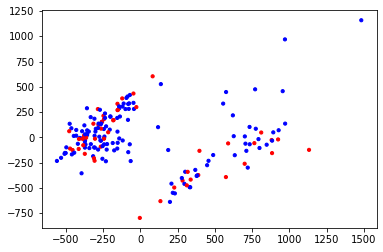

In [127]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=colours, s=10);

--------------------

The natural next step is to see if - not one variable alone - multiple variables can predict the cluster. If yes, then there is some strong correlation, and that would be helpful for prediction (e.g. using weather forecast to predict demand on the following day). 


So we want to build a classifier that receives, as input, the available information about a given day (weather, is_weekend...), and produces, as output, the class (in which of the 2 clusters that day belongs to).

Let's start by creating the classes (i.e. the clusters)

In [128]:
from sklearn.cluster import KMeans

In [129]:
K=2
k=KMeans(K)

In [130]:
k.fit(dt_reduced)

KMeans(n_clusters=2)

Let's visualize it

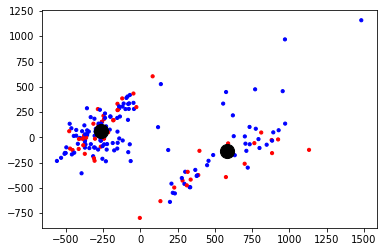

In [131]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=colours, s=10)

plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], s=200, c='black')

So, let's create a new column ("cluster"), that has the "class"

In [141]:
dt_reduced['cluster']=k.fit_predict(dt_reduced)

Again, we need to add weather and date information. Can you do it?

In [142]:
fnew=dt_reduced[:]
fnew=fnew.set_index(dt.index)
fnew.index.names = ['date']
fnew=fnew.reset_index()

In [143]:
f_days=f.groupby('date').mean()
f_days=f_days.reset_index()

In [145]:
f_merged=pd.merge(f_days[['temp', 'prcp', 'fog', 'rain_drizzle', 'is_weekend', 'date']], fnew,  on='date', how='right')

In [146]:
len(f_merged)

182

In [147]:
f_merged=f_merged.set_index('date')

In [148]:
del f_merged[0]
del f_merged[1]

Now, you have everything to create your classifier. Just pick your favourite one and run it!

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [150]:
split=int(len(f_merged)*2/3)
trainset=f_merged[:split]
testset=f_merged[split:]

In [151]:
x=trainset[['temp', 'prcp', 'fog', 'rain_drizzle', 'is_weekend']]
y=trainset['cluster']
x_new=testset[['temp', 'prcp', 'fog', 'rain_drizzle', 'is_weekend']]
y_new=testset['cluster']


In [152]:
lgr=LogisticRegression()

In [153]:
lgr.fit(x,y)

LogisticRegression()

Don't forget to evaluate... check the "score" and the confusion matrix.

In [154]:
print(lgr.score(x_new,y_new))
y_pred=lgr.predict(x_new)

0.9836065573770492


In [155]:
confusion_matrix(y_pred, y_new)

array([[43,  1],
       [ 0, 17]], dtype=int64)

Fascinating, isn't it? There is STRONG correlation, then...

----------

## Part 6 - Multidimensional scaling (MDS)

Let's now try a different technique, multidimensional scaling, or MDS. It's in another part of sklearn:

In [67]:
from sklearn.manifold import MDS

As usual, let's create the object

In [68]:
mds=MDS() #by default it maps to 2D (if you want another option, just use the parameter n_components)

We will use the original data from above, already in the day time series format. So, the object dt. 

In [69]:
mds.fit(dt)

MDS()

In MDS, the new data is said to be "embedded" in a (normally) 2D space. The attribute that has the corresponding data is called embedding_.

Try
> mds.embedding_

The output is a list of 2D datapoints. Can you visualize it?

In [70]:
mds.embedding_

array([[-1929.47920176,  -720.57798618],
       [  241.73052429,    99.17551372],
       [  233.93510566,   326.8473469 ],
       [  207.30161097,   472.02249025],
       [  107.08258536,  -498.10944551],
       [ -179.98579851,   328.84283105],
       [  385.6394742 ,   184.09686227],
       [  309.79755195,   130.60806233],
       [ -388.23764331, -1236.61969182],
       [  285.62238405,  -473.92215311],
       [  299.55157252,  -497.43339242],
       [  324.33666809,   193.68868154],
       [ -579.43923623,   130.53636329],
       [ -242.78575584,   275.932047  ],
       [   57.29909802,   434.6702125 ],
       [  414.20380093,   302.83339895],
       [ -551.22331668,  -797.93250549],
       [  298.31520984,  -557.11418458],
       [   34.31365384,   230.29965055],
       [  227.47815075,   280.77274351],
       [ -409.68369242,  -515.28926558],
       [   58.90145906,   566.72839288],
       [ -384.36667936,   311.26765226],
       [  347.97282017,  -424.36111844],
       [  359.39

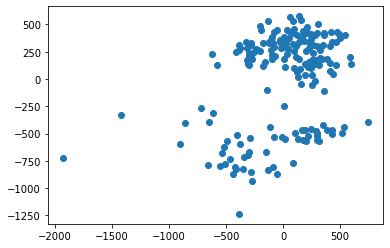

In [71]:
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1])

Is it the same as above? Compare it with the PCA results...